# Performance comparison
In this notebook we'll take a look at the performance metrics for the different models and visualise them to better compare them.

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [2]:
df = pd.read_csv('Data/metrics.csv', index_col=0)
df

,accuracy,log_loss,negative.precision,negative.recall,negative.f1-score,negative.support,neutral.precision,neutral.recall,neutral.f1-score,neutral.support,...,positive.f1-score,positive.support,macro avg.precision,macro avg.recall,macro avg.f1-score,macro avg.support,weighted avg.precision,weighted avg.recall,weighted avg.f1-score,weighted avg.support
Dacy,0.688333,1.346617,0.863946,0.566964,0.684636,224,0.04908,0.571429,0.090395,14,...,0.852761,362,0.623882,0.635450,0.542597,600,0.902053,0.688333,0.772206,600
LogisticRegression,0.941667,0.174098,1.000000,0.880952,0.936709,42,0.00000,0.000000,0.000000,1,...,0.955975,77,0.642276,0.622655,0.630895,120,0.944715,0.941667,0.941265,120
MultinomialNB,0.920777,0.592695,0.862170,0.989899,0.921630,297,0.00000,0.000000,0.000000,10,...,0.933333,362,0.614626,0.626467,0.618321,669,0.913965,0.920777,0.914187,669
MultinomialNB-TfIdf,0.928251,0.276242,0.884848,0.983165,0.931419,297,0.00000,0.000000,0.000000,10,...,0.938659,362,0.618450,0.630668,0.623360,669,0.917969,0.928251,0.921414,669


## Accuracy
Let's look at overall accuracy first. This is how many correct predictions the model made out of all the predictions.

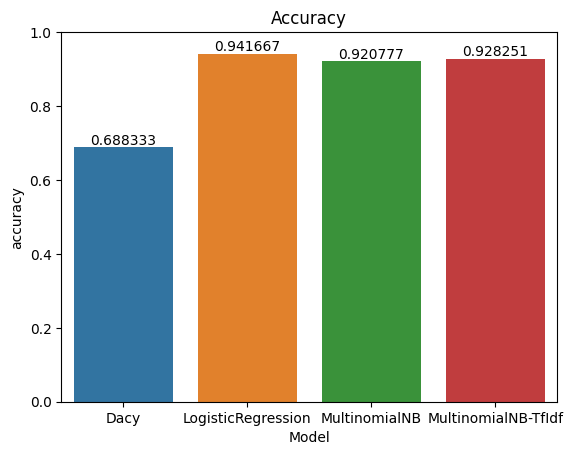

In [3]:
ax = sns.barplot(df, x=df.index, y='accuracy')
ax.bar_label(ax.containers[0])
plt.ylim(0, 1)
plt.xlabel('Model')
plt.title('Accuracy')
plt.show()

Logistic Regression has the highest `accuracy` but the difference is not that high.

## Negative accuracy
It might be more interesting to identify negative sentiment. Use cases for this could be a bot auto-replying to negative review asking the reviewer to reach out to customer service to resolve the issue.

The metrics here are `precision`, `recall`, and `f1-score`.

- **`Precision`**: How many of our predictions were true?
- **`Recall`**: How many true values did we predict?
- **`F1-score`**: Harmonic mean of the two as an overall score.

A bad `precision` means a lot of false-positives (we overestimated). A bad `recall` means a lot of false-negatives (we underestimated).

You could argue that in the previous use case `precision` is more important. We want to make sure the ones we identify as negative actually are negative, so that people who leave positive reviews aren't annoyed with wrong bot replies.

In [4]:
cols = ['negative.precision', 'negative.recall', 'negative.f1-score']
df1 = df.melt(value_vars=cols, var_name='Metric', ignore_index=False).reset_index()

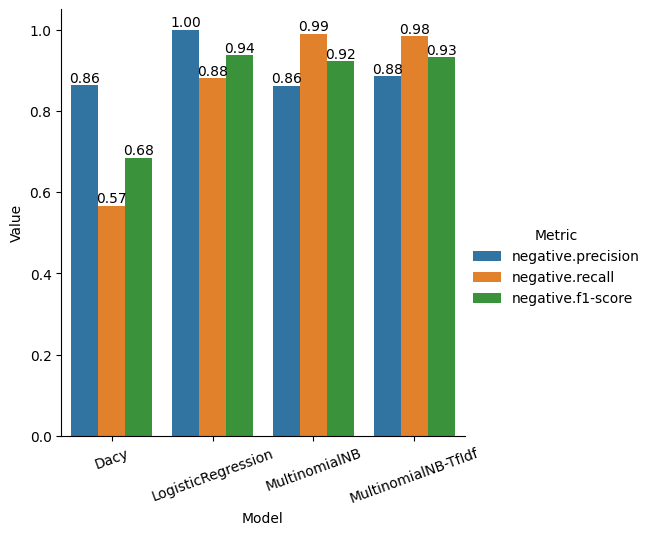

In [5]:
g = sns.catplot(data=df1, x='index', y='value', hue='Metric', kind='bar')
g.set_axis_labels('Model', 'Value')
g.set_xticklabels(rotation=20)
ax = g.ax
for c in ax.containers:
    ax.bar_label(c, fmt='%.2f')
plt.show()

Logistic Regression again takes the lead with highest `negative precision`, though it lacks in `negative recall` compared to the others.

## Positive accuracy
Same metrics as for negative sentiments.

Negative recall and positive precision usually go hand in hand. If you misclassified some negatives as being positive, then conversely there were predicted positives that were incorrect.

In [6]:
cols = ['positive.precision', 'positive.recall', 'positive.f1-score']
df2 = df.melt(value_vars=cols, var_name='Metric', ignore_index=False).reset_index()

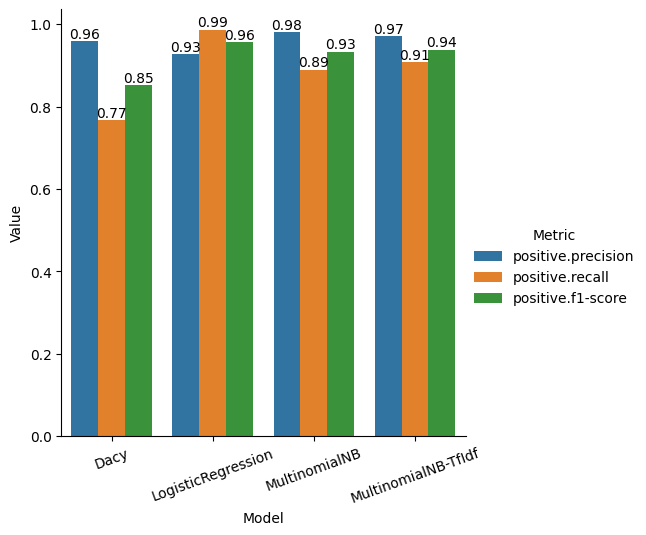

In [7]:
g = sns.catplot(data=df2, x='index', y='value', hue='Metric', kind='bar')
g.set_axis_labels('Model', 'Value')
g.set_xticklabels(rotation=20)
ax = g.ax
for c in ax.containers:
    ax.bar_label(c, fmt='%.2f')
plt.show()

Logistic Regression has the highest `F1-score`, and as expected has a lower `positive precision` due to its lower `negative recall`. Likewise it has great `positive recall` because of its fantastic `negative precision`.

## Log loss
Log loss is a a measure of mean error, taking the probability of the classification into account. Having a high confidence in a wrong prediction is a bigger error than if the model wasn't so sure of the result. Conversely, a high confidence in a correct prediction is better than low confidence. We want a low value.

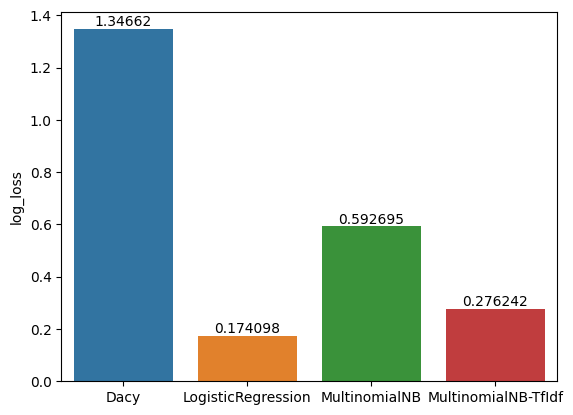

In [8]:
ax = sns.barplot(df, x=df.index, y='log_loss')
ax.bar_label(ax.containers[0])
plt.show()

Logistic Regression again comes out on top, followed by Naive Bayes using TF-IDF vectors.

## Conclusion
Logistic Regression and Naive Bayes both perform well in tests with Logistic Regression being better at `negative precision` and `positive recall` and vice versa.

Logistic regression also had the most appropriate confidence in its predictions, i.e. high confidence in correct predictions and low confidence in wrong ones.